In [1]:
%load_ext autoreload
%autoreload 2
#from pangolin.interface import *
from pangolin import *

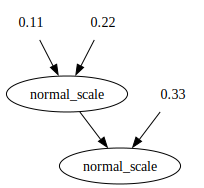

x.shape=()
y.shape=()
x.cond_dist=normal_scale
y.cond_dist=normal_scale


In [2]:
# basic model creation
x = normal(0.11, 0.22)
y = normal(x, 0.33)
display(viz_upstream(y))
print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"{x.cond_dist=}")
print(f"{y.cond_dist=}")

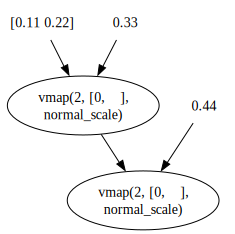

x.shape=(2,)
y.shape=(2,)
x.cond_dist=VMapDist(base_cond_dist=normal_scale)
y.cond_dist=VMapDist(base_cond_dist=normal_scale)


In [3]:
# vmap
# can't implicitly pass lists because it would get confused with pytree
locs = makerv([0.11,0.22])
x = vmap(normal,(0,None))(locs,0.33)
y = vmap(normal,(0,None))(x,0.44)
display(viz_upstream(y))
print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"{x.cond_dist=}")
print(f"{y.cond_dist=}")

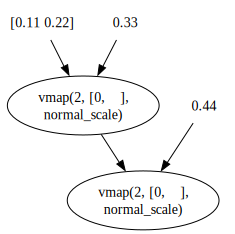

x.shape=(2,)
y.shape=(2,)
x.cond_dist=VMapDist(base_cond_dist=normal_scale)
y.cond_dist=VMapDist(base_cond_dist=normal_scale)


In [4]:
# plate as an alternative to vmap
locs = [0.11,0.22]
x,y = plate(locs)(
    lambda loc: (xi := normal(loc,0.33),
                 yi := normal(xi, 0.44)))
display(viz_upstream(y))
print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"{x.cond_dist=}")
print(f"{y.cond_dist=}")

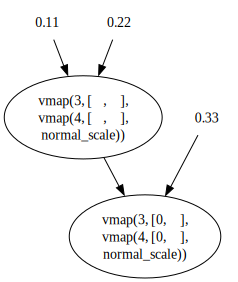

x.shape=(3, 4)
y.shape=(3, 4)
x.cond_dist=VMapDist(base_cond_dist=VMapDist(base_cond_dist=normal_scale))
y.cond_dist=VMapDist(base_cond_dist=VMapDist(base_cond_dist=normal_scale))


In [5]:
# multiple nested plates
x, y = plate(N=3)(
    lambda: plate(N=4)(
        lambda: (xi := normal(.11,.22),
                 yi := normal(xi, .33))))
display(viz_upstream(y))
print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"{x.cond_dist=}")
print(f"{y.cond_dist=}")

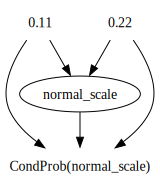

In [6]:
# transform dists to get deterministic probability nodes
loc = makerv(0.11)
scale = makerv(0.22)
x = normal_scale(loc,scale)
fun = CondProb(normal_scale)
p = fun(x,loc,scale)
viz_upstream(p)

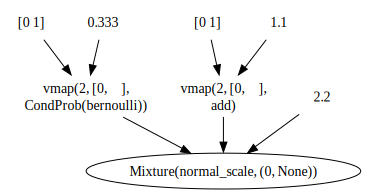

a: (2,) [     ] [0 1]
b: ()   [     ] 0.333
c: (2,) [a,b  ] vmap(2, [0, ∅], 
CondProb(bernoulli))
d: (2,) [     ] [0 1]
e: ()   [     ] 1.1
f: (2,) [d,e  ] vmap(2, [0, ∅], 
add)
g: ()   [     ] 2.2
h: ()   [c,f,g] Mixture(normal_scale, (0, None))


In [7]:
# create mixture
y = mix(bernoulli(0.333), lambda x: normal_scale(x+1.1, 2.2))
display(viz_upstream(y))
print_upstream(y)

The above graph might look confusing, but here's how to think about it:
 - The first vmap computes P[X=x] for x in [0,1]
 - The second vmap computes the location parameter for each possible value of x
 - The final mixture node plugs everything together

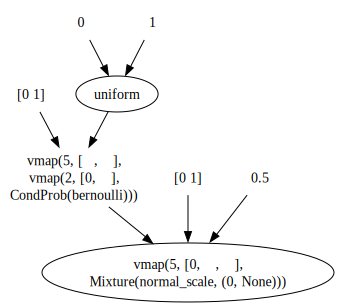

In [8]:
# vmapped mixtures — kinda tricky to look at, but seemingly correct!
# Note: There's an optimization opportunity here
u = uniform(0,1)
x = plate(N=5)(
    lambda: mix(bernoulli(u), lambda z: normal(z,0.5)))
display(viz_upstream(x))

In [9]:
import graphviz
dot = graphviz.Digraph()
dot.node?

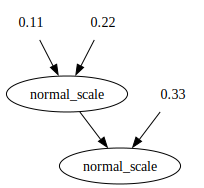

In [10]:
# basic model creation
x = normal(0.11, 0.22)
y = normal(x, 0.33)
display(viz(y))

In [11]:
from pangolin import new_infer as infer
infer.sample(y)

skipping MCMC...


Array([ 2.85490572e-01,  4.39227045e-01, -2.66153693e-01,  1.33749604e-01,
       -3.77028212e-02,  2.81381160e-01,  2.67032385e-01,  3.55502546e-01,
        2.99317956e-01, -7.12147057e-02,  1.11614779e-01,  1.15841448e-01,
       -5.22541165e-01,  4.36366200e-01,  2.36375123e-01,  2.74941862e-01,
        2.44471744e-01, -2.52657473e-01,  5.58922529e-01,  1.00806057e-02,
        6.53697193e-01,  2.86055803e-01, -1.10407859e-01, -1.87091395e-01,
        4.24875379e-01,  1.11880362e-01, -1.39821947e-01,  5.09908378e-01,
        8.05314779e-01,  2.01660991e-02, -6.44661486e-01,  4.31064308e-01,
       -2.90798545e-01,  3.32003385e-02,  3.98734450e-01, -1.71600580e-02,
        7.42864609e-02, -2.33993307e-01, -1.01648711e-01, -2.39072591e-01,
        7.24911571e-01, -6.04634434e-02,  8.36850405e-02, -7.83714116e-01,
        4.11613375e-01,  1.82076365e-01,  2.32001275e-01,  4.90252197e-01,
       -2.55165428e-01,  1.04979895e-01,  1.12060010e-02, -1.18070155e-01,
        9.19925451e-01, -

skipping MCMC...


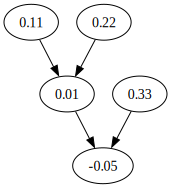

In [12]:
from pangolin.interface import *
x = normal(0.11, 0.22)
y = normal(x, 0.33)
viz_samples(y)

skipping MCMC...


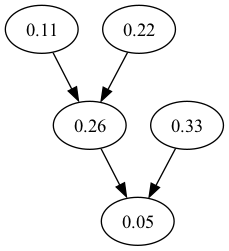

In [13]:
from pangolin.interface import *
x = normal(0.11, 0.22)
y = normal(x, 0.33)
viz_samples_live(y)

skipping MCMC...


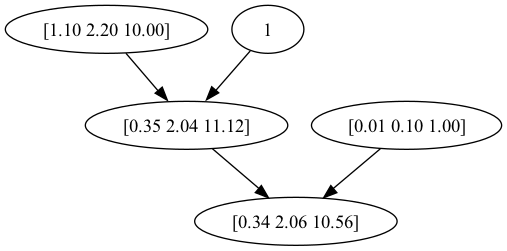

In [14]:
from pangolin.interface import *
x = vmap(normal,(0,None))(makerv([1.1,2.2,10]),1)
y = vmap(normal,0)(x,makerv([.01,.1,1]))
viz_samples_live(y)